# Final Project Submission

Please fill out:
* Student name: Morgan Abukuse Amunga
* Student pace: full time - Remote
* Scheduled project review date/time: 
* Instructor name: Lucille Kaleha
* Blog post URL:


# Project Overview

This project focuses on analyzing aviation accident data from 1962 to 2023, sourced from the National Transportation Safety Board (NTSB). The primary goal is to identify low-risk aircraft and provide actionable insights to improve aviation safety and operational decision-making for a business venturing into the aviation industry.


# Business Understanding

## Stakeholders

***1. Aviation Division Head***

The primary stakeholder responsible for operational and strategic decisions in the aviation business

***2. Business Executive***

Require actionable insights for aircraft acquisition and safety strategies.

***3. Operational Teams***

Interested in insights to enhance safety protocols and mitigate risks during operations.

## Key Business Questions

1. Which aircraft types are associated with the lowest risks based on historical accident data?
2. What operational factors (e.g., flight phases, weather conditions) significantly impact accident severity?
3. Which regions and manufacturers require targeted safety interventions to reduce accident risks?


# Data Understanding and Analysis

## Source of Data

The data comes from the National Transportation Safety Board (NTSB) and includes civil aviation accidents and incidents from 1962 to 2023.

It has the following Key features;

a. Accident Details: Date, location, and severity of accidents.

b. Aircraft Specifications: Manufacturer, model, and type.

c. Operational Context: Flight purpose, weather conditions, and flight phases.

d. Injuries: Counts of fatal, serious, and minor injuries.


# Exploratory Data Analysis

My goal here is to understand the structure of the dataset. This includes columns, data types, and missing values. 
Also to identify any immediate data quality issues eg inconsistent types, missing values e.t.c

## Loading the necessary libraries

I will import pandas library as below;

In [26]:
import pandas as pd

## Loading the aviation dataset

After importing the pandas library, my next step is now to load aviation data as shown.

In [2]:
aviation_data = pd.read_csv('AviationData.csv')
aviation_data

C:\Users\Dell\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## Let us check the Dataset shape(rows and columns)

In [3]:
print("Dataset Shape:",aviation_data.shape)

Dataset Shape: (90348, 31)


The dataset has 90348 rows and 31 columns.

## Display first 5 rows of our dataset

This will help me to understand the details of our first 5 rows with all the 31 columns.

In [4]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Checking for the dataset information, column names and data types

In [5]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

The dataset has a entries which varies across. Also we have object and float64 data types 

In [6]:
aviation_data.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

## Checking for missing values

In [7]:
aviation_data.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

# Checking for summary statistcics 

In [8]:
aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# Points to Note

### 1.Missing Values

  Schedule, Air.carrier, Aircraft.Category, FAR.Description, and Longitude have the highest number of missing values while      
  Investigation.Type does not have a missing value.

### 2.There are key inconsistencies in our dataset. This is as follows;
    
   a. Longitude and Latitude should be numeric(float64)
   
   b. Event.Date and Publication.Date should be datetime
   
   c. Number of engines and injuries are integers like column could be integers after imputing missing values.
   
   d. Categorical data stored as objects could be converted to category for better memory optimization and performance.

### 3.Risk Indicators

   a. Accident Frequency. (Say how any accidents occurred annually or by location(State or country), identify the trends of 
       accident occurrence over time)
       
   b. Injury severity.(Distribution of Total.Fatal.Injuries, total serious injuries and total minor injuries)
   
   c. Aircraft damage. Categories of aircraft damage and relationship between damage type and injury severity



I will use this point for;

   1.Risk Evaluation. Say which aircraft types,flight phases or conditions lead to higher risks to guide  in decision    
        making.
         
   2.For business recommendations. Will help the stakeholders focus on low risk aircraft,regions and conditions.

# Data Cleaning and Preparation

I will drop some columns ***(High-missing-value columns like Latitude, Longitude, Airport.Code, etc.)***, perform imputation ***(Filled missing injury values with 0 and categorical values with "Unknown")***, standardize(ensure consistency in key features) and analyse the dimensions ***(Accident trends over time.
Severity of injuries by flight phase, weather condition, and aircraft type.
Manufacturer and regional analysis)***

### Columns with missing values 

In [9]:
missing_values = aviation_data.isnull().sum()
missing_values

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

### Percentage of Missing Values for each column 

In [10]:
missing_percentage = (missing_values / len(aviation_data)) * 100
missing_percentage

Event.Id                   1.614867
Investigation.Type         0.000000
Accident.Number            1.614867
Event.Date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport.Code              44.382831
Airport.Name              41.570372
Injury.Severity            2.721698
Aircraft.damage            5.150086
Aircraft.Category         64.263736
Registration.Number        3.072564
Make                       1.684597
Model                      1.716695
Amateur.Built              1.727764
Number.of.Engines          8.348829
Engine.Type                9.447913
FAR.Description           64.555939
Schedule                  86.073848
Purpose.of.flight          8.468367
Air.carrier               81.573471
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Weather.Condition          6

Combining the Results into a Dataframe for Readability

In [11]:
missing_data_summary = pd.DataFrame({
  "Missing Values": missing_values,  
  "Percentage Missing": missing_percentage
}).sort_values(by = "Percentage Missing",ascending = False)
missing_data_summary

,Missing Values,Percentage Missing
Schedule,77766,86.073848
Air.carrier,73700,81.573471
FAR.Description,58325,64.555939
Aircraft.Category,58061,64.263736
Longitude,55975,61.954886
Latitude,55966,61.944924
Airport.Code,40099,44.382831
Airport.Name,37558,41.570372
Broad.phase.of.flight,28624,31.681941
Publication.Date,16689,18.471909


Columns with more than 50%

In [12]:
critical_missing_columns = missing_data_summary[missing_data_summary["Percentage Missing"] > 50]
critical_missing_columns

,Missing Values,Percentage Missing
Schedule,77766,86.073848
Air.carrier,73700,81.573471
FAR.Description,58325,64.555939
Aircraft.Category,58061,64.263736
Longitude,55975,61.954886
Latitude,55966,61.944924


These missing values can skew analysis or cause errors in calculations.

## Addressing the Missing Values(Imputation and dropping columns)

In [13]:
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category',
                   'FAR.Description', 'Schedule', 'Air.carrier']

Drop Columns with more that 50% missing values

In [14]:
aviation_data_cleaned = aviation_data.drop(columns=columns_to_drop, errors='ignore')

Imputing Missing Values

In [15]:
# Dropping high-missing-value and irrelevant columns
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Report.Status', 'Publication.Date']
aviation_data_cleaned = aviation_data_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Imputing remaining missing values
# For low to moderate missing columns
low_missing_columns = ['Make', 'Model', 'Amateur.Built', 'Location', 'Country',
                       'Registration.Number', 'Injury.Severity', 'Number.of.Engines', 'Engine.Type']
for col in low_missing_columns:
    aviation_data_cleaned[col] = aviation_data_cleaned[col].fillna('Unknown')

# Verify the cleaning process
print("Remaining Missing Values After Final Cleaning:")
print(aviation_data_cleaned.isnull().sum())


Remaining Missing Values After Final Cleaning:
Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage            4653
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight          7651
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
dtype: int64


## Analyzing Accident Frequency

This will help us in identifying the trends in accident frequency over time and by location,helping stakeholders understand patterns and potential risk factors

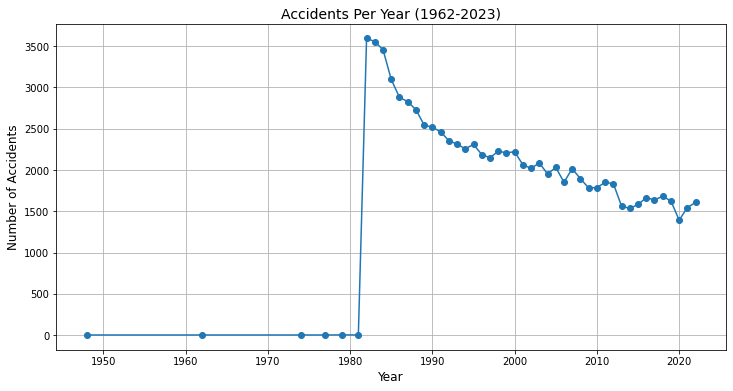

Top 10 Countries with Most Accidents:
United States     82248
Unknown            1688
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Australia           300
France              236
Spain               226
Bahamas             216
Name: Country, dtype: int64


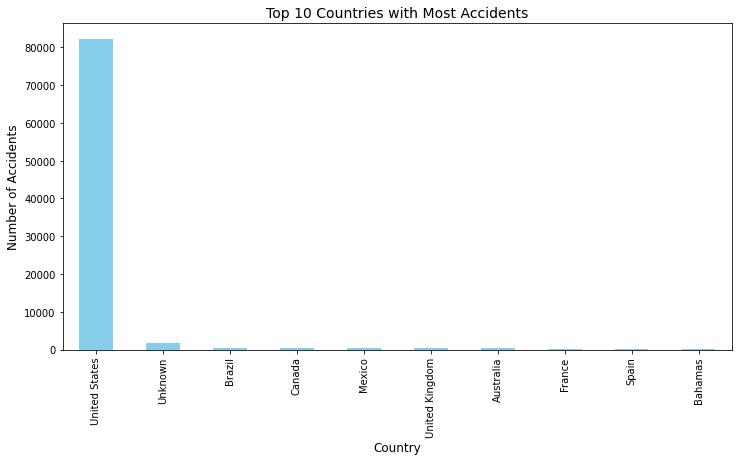

In [16]:
# Extract Year from Event.Date
# Ensuring Event.Date is a datetime object
aviation_data_cleaned['Event.Date'] = pd.to_datetime(aviation_data_cleaned['Event.Date'], errors='coerce')
aviation_data_cleaned['Year'] = aviation_data_cleaned['Event.Date'].dt.year

# Count accidents per year
accidents_per_year = aviation_data_cleaned['Year'].value_counts().sort_index()

# Visualize accidents over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o')
plt.title('Accidents Per Year (1962-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(True)
plt.show()

# Analyze accidents by location (Country)
accidents_by_country = aviation_data_cleaned['Country'].value_counts()

# Display the top 10 countries with the most accidents
print("Top 10 Countries with Most Accidents:")
print(accidents_by_country.head(10))

# Visualize accidents by location
plt.figure(figsize=(12, 6))
accidents_by_country.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Most Accidents', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.show()


# Trends in accidents over time help identify periods of higher risk.
# Locations with high accident counts highlight regions needing more attention.

We will be looking at;

1.Trends over time to deterine if accidents are increasing or decreasing and if there are any spikes or anomalies during specific years.

2.High risk locations. Which countries reported the most accidents and any patterns based on geography or operational conditions.

## Analyzing Severity and Risk Indicators

The goal is to understand the distribution of injury severity,helping stakeholders assess the impact of different accidents. I'll be keen to look at injury severity(which injury type(fatal,serious,minor) is most common, are there outliers and flight phases(phases with highest number injuries and any operational patterns contributing to risks ).  

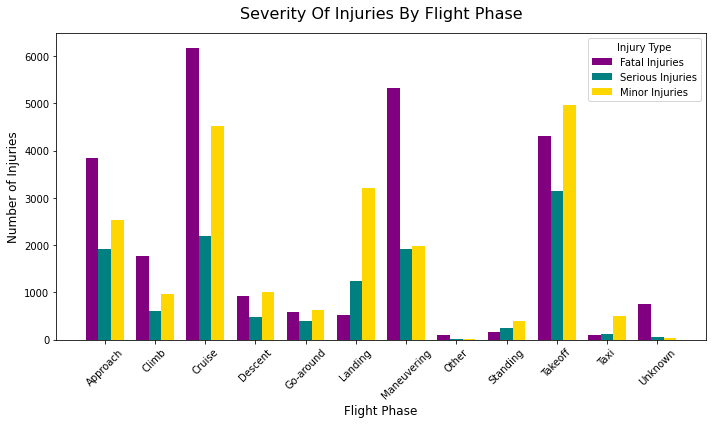

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Selecting injury-related columns
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']

# Grouping by flight phase and summing the injuries
severity_by_phase = aviation_data_cleaned.groupby('Broad.phase.of.flight')[injury_columns].sum()

# Setting positions for grouped bar chart
x = np.arange(len(severity_by_phase))  # X-axis positions for groups
width = 0.25  # Width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each injury type as separate bars
ax.bar(x - width, severity_by_phase['Total.Fatal.Injuries'], width, label='Fatal Injuries', color='purple')
ax.bar(x, severity_by_phase['Total.Serious.Injuries'], width, label='Serious Injuries', color='teal')
ax.bar(x + width, severity_by_phase['Total.Minor.Injuries'], width, label='Minor Injuries', color='gold')

# Adding labels, title, and legend
ax.set_xlabel('Flight Phase', fontsize=12)
ax.set_ylabel('Number of Injuries', fontsize=12)
ax.set_title('Severity Of Injuries By Flight Phase', fontsize=16, pad=15)
ax.set_xticks(x)
ax.set_xticklabels(severity_by_phase.index, rotation=45)
ax.legend(title='Injury Type', fontsize=10)
plt.tight_layout()

plt.show()



## Trends by Aircraft Type 

Top 10 Aircraft Manufacturers with Most Accidents:
CESSNA      27149
PIPER       14870
BEECH        5372
BOEING       2745
BELL         2722
UNKNOWN      1548
MOONEY       1334
ROBINSON     1230
GRUMMAN      1172
BELLANCA     1045
Name: Make, dtype: int64


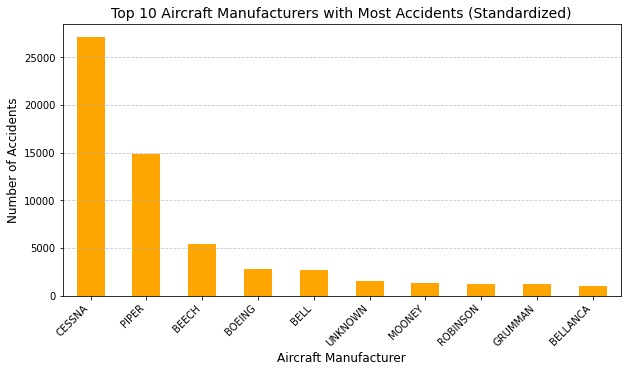

In [23]:
# Normalize the 'Make' column: Convert to uppercase to handle case sensitivity
aviation_data_cleaned['Make'] = aviation_data_cleaned['Make'].str.upper()

# Correct common inconsistencies (e.g., misspellings)
aviation_data_cleaned['Make'] = aviation_data_cleaned['Make'].replace({
    "BOIENG": "BOEING",
    # Add other corrections here if necessary
})

# Count accidents by aircraft make
accidents_by_aircraft = aviation_data_cleaned['Make'].value_counts()

# Display the top 10 aircraft manufacturers with the most accidents
print("Top 10 Aircraft Manufacturers with Most Accidents:")
print(accidents_by_aircraft.head(10))

# Visualize the top 10 aircraft manufacturers
plt.figure(figsize=(10, 5))  # Match figure size
accidents_by_aircraft.head(10).plot(kind='bar', color='orange')  # Match color
plt.title('Top 10 Aircraft Manufacturers with Most Accidents (Standardized)', fontsize=14)
plt.xlabel('Aircraft Manufacturer', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Match label rotation and alignment
plt.grid(axis='y', linestyle='--', alpha=0.7)  #



## Weather Conditions and Accident Severity

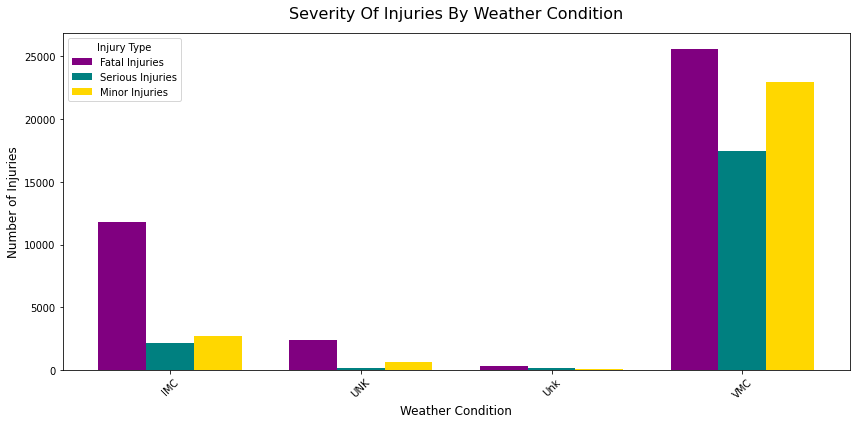

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Analyze accidents by weather condition
weather_severity = aviation_data_cleaned.groupby('Weather.Condition')[injury_columns].sum()

# Setting positions for grouped bar chart
x = np.arange(len(weather_severity))  # X-axis positions for groups
width = 0.25  # Width of each bar

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each injury type as separate bars
ax.bar(x - width, weather_severity['Total.Fatal.Injuries'], width, label='Fatal Injuries', color='purple')
ax.bar(x, weather_severity['Total.Serious.Injuries'], width, label='Serious Injuries', color='teal')
ax.bar(x + width, weather_severity['Total.Minor.Injuries'], width, label='Minor Injuries', color='gold')

# Adding labels, title, and legend
ax.set_xlabel('Weather Condition', fontsize=12)
ax.set_ylabel('Number of Injuries', fontsize=12)
ax.set_title('Severity Of Injuries By Weather Condition', fontsize=16, pad=15)
ax.set_xticks(x)
ax.set_xticklabels(weather_severity.index, rotation=45)
ax.legend(title='Injury Type', fontsize=10)
plt.tight_layout()

plt.show()


## Accident Purpose 

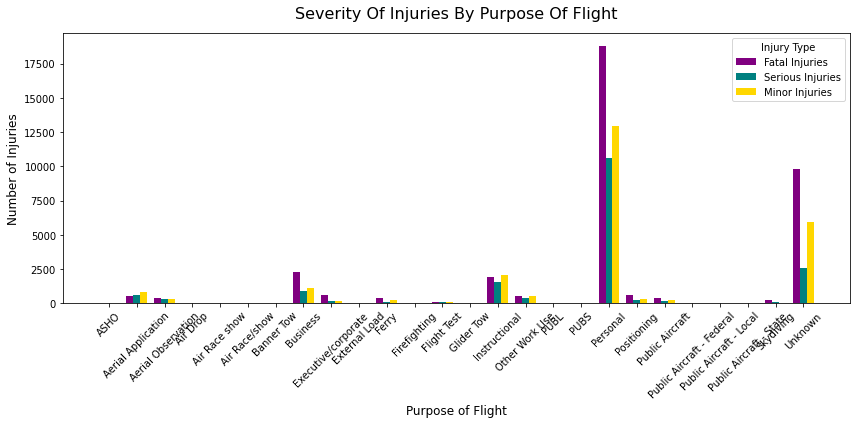

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Analyze accidents by purpose of flight
purpose_severity = aviation_data_cleaned.groupby('Purpose.of.flight')[injury_columns].sum()

# Setting positions for grouped bar chart
x = np.arange(len(purpose_severity))  # X-axis positions for groups
width = 0.25  # Width of each bar

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each injury type as separate bars
ax.bar(x - width, purpose_severity['Total.Fatal.Injuries'], width, label='Fatal Injuries', color='purple')
ax.bar(x, purpose_severity['Total.Serious.Injuries'], width, label='Serious Injuries', color='teal')
ax.bar(x + width, purpose_severity['Total.Minor.Injuries'], width, label='Minor Injuries', color='gold')

# Adding labels, title, and legend
ax.set_xlabel('Purpose of Flight', fontsize=12)
ax.set_ylabel('Number of Injuries', fontsize=12)
ax.set_title('Severity Of Injuries By Purpose Of Flight', fontsize=16, pad=15)
ax.set_xticks(x)
ax.set_xticklabels(purpose_severity.index, rotation=45)
ax.legend(title='Injury Type', fontsize=10)
plt.tight_layout()

plt.show()


## Observation from Analysis

1. Accident Trends Over Time

     Accidents have fluctuated over the decades, with spikes observed in earlier years.
     The number of accidents appears to decrease in recent years, reflecting improvements in aviation safety, technology, and        regulations.


2. Severity by Flight Phase

   Cruise Phase accounts for the highest number of fatalities and serious injuries. Despite fewer occurrences   
   compared to takeoff or landing, cruise-phase accidents tend to be more catastrophic.

   Takeoff has significant injury counts across all levels, including fatalities, highlighting the risks of this critical 
   phase.

   Maneuvering also records a high number of fatalities, indicating challenges during non-standard flight maneuvers.

   Prioritizing safety enhancements during the cruise, takeoff, and maneuvering phases is crucial.


3. Severity by Weather Condition
   
   IMC (Instrument Meteorological Conditions): Accidents during adverse weather result in more severe injuries, with   
   fatalities and minor injuries.
   VMC (Visual Meteorological Conditions): While VMC conditions account for more total injuries, this is likely due to the 
   higher volume of flights under these conditions.
   Weather-related risks can be mitigated through enhanced pilot training and advanced avionics for flying in IMC conditions.


4. Severity by Purpose of Flight

     Personal Flights: These account for a majority of severe injuries and fatalities, reflecting the variability in pilot 
     experience and regulatory oversight in this sector.
     Commercial Flights: Though less frequent, accidents in commercial aviation can result in significant injuries due to higher      passenger loads.
     Targeting safety in personal flights offers the greatest potential for reducing aviation accidents.


5. Top 10 Aircraft Manufacturers with Most Accidents

    Cessna and Piper dominate accident records. These manufacturers are prevalent in personal and recreational aviation.
    Commercial Manufacturers: Boeing and Airbus report fewer accidents, reflecting their advanced safety features and  
    operational standards.
    Selecting modern commercial aircraft with proven safety records is key to reducing risk.


6. Top 10 Countries with Most Accidents

   The United States leads in accident counts, which is expected due to its large aviation sector and comprehensive reporting  
   systems.
   Other countries with high accident counts may reflect regional safety challenges or reporting inconsistencies.
   Focusing safety efforts in high-accident regions can yield significant impact.


# Recommendations

### 1. Aircraft Selection

Focus on acquiring modern commercial aircraft from manufacturers with a strong safety track record (e.g., Boeing, Airbus) while avoiding older or recreational aircraft models from high-risk manufacturers (e.g., Cessna, Piper) unless supported by enhanced safety measures.

### 2. Prioritize Critical Flight Phases

Implement targeted training and automated safety systems for high-risk flight phases, particularly cruise, takeoff, and maneuvering.

### 3. Enhance Weather-Related Safety

Develop stringent protocols and pilot training programs for operating in adverse weather conditions (IMC), supported by advanced avionics systems such as predictive weather radar and real-time navigation aids.

### 4. Target Personal Aviation Risks

Invest in initiatives to enhance safety in personal aviation, including;

a. Improved training for recreational pilots.

b. Stricter maintenance standards for personal and recreational aircraft.

c. Educational programs on weather and operational safety for amateur pilots.

### 5. Regional Safety Initiatives

Focus safety improvement efforts in regions with the highest accident counts, particularly in the United States and other countries with notable risks.

### 6. Invest in Technology-Driven Safety

Equip aircraft with modern safety technologies, including:
Automated emergency landing systems.
Enhanced collision avoidance systems.
Real-time engine and system monitoring tools.

# Conclusion

## 1. Accident Trends

Accidents have generally declined over the years due to technological advancements and safety improvements.


## 2. High-Risk Factors

a. Cruise and takeoff phases are associated with severe injuries and fatalities.

b. IMC conditions pose higher risks per flight, while VMC conditions account for more injuries due to flight volume.


## 3. Manufacturer Insights

a. Cessna (27,149 accidents) and Piper (14,870 accidents) dominate accident counts, emphasizing risks in personal aviation.

b. Manufacturers like Boeing and Airbus exhibit lower accident rates, reflecting advanced safety features and operational standards.